# 神经网络和机器学习之图像聚类

案例说明：图像聚类（卷积神经网络，CNN）

本案例利用卷积神经网络技术来做图像聚类。CIFAR-10是机器学习领域中一个用于图像识别的常见基础数据集。数据集共有10个类别，分别为airplane（0）、automodile（1）、bird（2）、cat（3）、deer（4）、dog（5）、frog（6）、horse（7）、ship（8）和truck（9）。

案例选择了keras框架，需要先安装keras和tensorflow。虚谷号教育版已经预装必要的库，可以直接使用。因为这个数据集很大，在虚谷号上训练比较慢，建议在电脑上训练。

本案例已经提供了训练好的模型，放在model文件夹中，文件名称为：4-model-vv.h5。如果想直接测试模型，请跳到“应用模型”环节，拍摄或者上传图片开始识别。

## 1.环境搭建

下面是安装命令：

pip install keras

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

建议选择清华源，速度将快很多。参考命令如下：

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 2.数据准备

CIFAR-10数据集由10个类的60000个 32 * 32 彩色图像（3个通道）组成，每个类有6000个图像，有50000个训练图像和10000个测试图像。

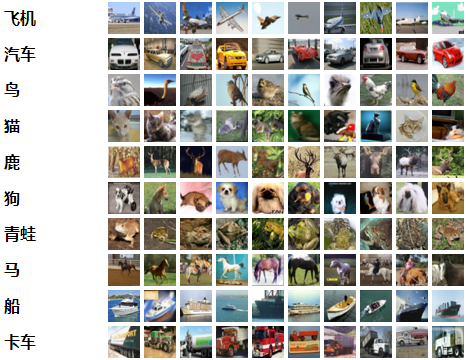

开始导入数据集吧。第一次使用这个数据集，计算机要先通过网络下载，文件较大（约160M），需要等待一定的时间。建议还是另外下载，放在“~/.keras/datasets/”中。

下载地址：http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

建议上传到虚谷号的桌面，然后用命令复制：

! cp ~/Desktop/cifar-10-batches-py.tar.gz ~/.keras/datasets/cifar-10-batches-py.tar.gz

In [15]:
#定义动物的名称，这样看起来会直观些。
things_class=["airplane","automodile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
import keras
cifar=keras.datasets.cifar10
(train_image,train_label),(test_image,test_label)=cifar.load_data()

使用Python的绘图工具，可以查看测试集与训练集的某张图片。看看“test_i[0]”是不是“青蛙”？

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_image[0])

### 关于数据格式

数据集采用了 `NumPy` 的数组 `ndarray` 。

关于ndarray数组的参数说明：

|  参数 |  描述 | 
| :------ | :------ |
|  shape |  数组形状 | 
|  dtype |  数据类型，可选，分为float32,uint8,int32等等 | 
|  order |  有"C"和"F"两个选项,分别代表，行优先和列优先，在计算机内存中的存储元素的顺序。 | 

In [ ]:
#查看train_image的数据格式，是uint8
print(train_image.dtype)

In [ ]:
#查看train_image的行数和列数的值，50000行，大小32*32，通道3
print(train_image.shape)

In [ ]:
#查看train_image的维度，值为4
print(train_image.ndim)

In [ ]:
# 看一下是什么东西吧。显示是“6”，代表“青蛙（frog）”。
print(train_label[0])
#train_label[0]的数据类型是numpy的数组，需要用int转换。
print(things_class[int(train_label[0])])

In [ ]:
# 看一下数据内容，是3维的数组。
print(train_image[21])

In [ ]:
# 找一下等于3（猫）的图片，有9,17,21,49979,49982,49983等
import numpy as np
np.where(train_label==3)

In [ ]:
# 看看猫的图片长什么样子，
plt.imshow(train_image[21])

## 3.建立模型

卷积神经网络的结构一般是将输入的图像进行多次卷积、池化，在多次卷积、池化的的过程中，图像的图像的尺寸会越来越小、特征会越来越明显，最后输入全连接层，完成预测或者分类任务。因此，最后的全连接层的神经元数量要和类别的数量相等。

在keras中可以通过Conv2D和MaxPool方便的添加卷积层和最大层对图像进行卷积和池化，通过以下代码建立卷积神经网络模型并进行编译。

In [1]:
import keras
from keras import layers
model=keras.models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))  #第一层要设置输入图片的尺寸（32*32）、颜色通道3
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D()) #池化
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D()) #池化
model.add(layers.Flatten()) #在全连接之前，需要将二维图片数据转换成一维数组
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))  #为了防止过拟合，Dropout层会随机的丢弃一部分神经网络连接
model.add(layers.Dense(10,activation='softmax'))  #使用softmax处理多分类问题，一共10个分类
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #在训练过程中打印出准确率（acc）指标

Using TensorFlow backend.


**拓展：给模型画图**

Keras中提供了一个功能，可以给这个模型画出直观的图。这需要一个名为`pydot`支持库，用pip安装。如果安装失败，可以试试更换pip源。

! pip install pydot

! pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pydot

一般来说，还需要安装`graphviz`。

在虚谷号上，用这样的命令来安装：sudo apt install graphviz。其他系统的安装，请自行百度。

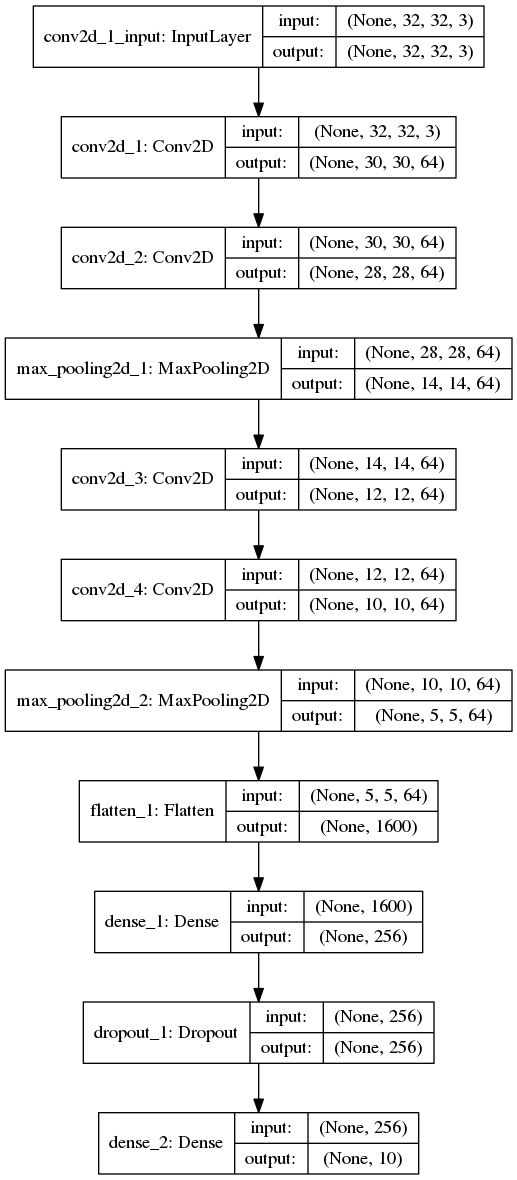

In [10]:
# 在目录下将产生一个名为“4-model.png”的图片，显示出这个多层的神经网络模型图
from keras.utils import plot_model
plot_model(model,to_file='4-model.png',show_shapes=True)

## 4.训练模型

In [ ]:
model.fit(x=train_image,y=train_label,batch_size=100,epochs=20,validation_data=(test_image,test_label))

由于图片的数据量比较庞大，而且卷积神经网络的训练需要大量的计算，因此每一轮次的训练需要较多的时间，不过仅仅训练5个轮次，就能看到loss在明显下降。用了10次，发现是loss是0.9928。

**注：**在虚谷号上训练，速度很慢，一轮估计要30分钟，batch_size不能设太高。

train_label和test_label中分别存储训练集与测试集中每张图片中的数字标签，可以通过代码查看测试集前10张图片的数字标签。

In [22]:
#转换为列表输出，看起来舒服一点。
test_label[0:10].tolist()

[[3], [8], [8], [0], [6], [6], [1], [6], [3], [1]]

再利用模型来识别测试中前10张图片的内容，可以看到图片中的物品所对应的数字标签被成功地识别了出来。在我的机器人上仅仅训练了5次，错误率还是比较高的。

In [20]:
#用predict_classes方法，直接输出识别结果。
model.predict_classes(test_image[0:10])

array([3, 1, 8, 0, 6, 6, 1, 6, 2, 1])

## 5.保存模型

训练出来的模型，可以保存。下次使用的时候载入，还可以继续训练。一般保存为h5格式，需要先安装h5py。

命令如下：pip install h5py

In [ ]:
model.save('./model/4-model-vv.h5')   # HDF5文件

## 6.载入模型

用`load_model`载入训练好的模型文件，就可以直接用来识别图片了。如果是新版本Keras保存的模型文件，需要加上参数`compile=False`。

In [13]:
from keras.models import load_model  
model = load_model('./model/4-model-vv.h5',compile=False)

In [ ]:
#这个模型还可以继续训练
model.fit(x=train_image,y=train_label,batch_size=500,epochs=5,validation_data=(test_image,test_label))

In [25]:
#测试一下数据集中的test部分
model.predict_classes(test_image[0:10])

array([3, 1, 8, 0, 6, 6, 1, 6, 2, 1])

In [26]:
#对比一下标签，看看错误率
test_label[0:10].tolist()

[[3], [8], [8], [0], [6], [6], [1], [6], [3], [1]]

模型的测试结果，用`predict`输出的是一个数组，包含这个图片在不同的分类中的概率，`predict_classes`则直接输出了最大值。如`test_image`中的第一张图片（test_image[0:1]），最大值是第4项（序号为3），值为`8.9328235e-01`。

In [33]:
model.predict(test_image[0:1])

array([[8.2934421e-04, 2.9209928e-04, 2.7075615e-03, 8.9328235e-01,
        6.2442119e-03, 2.6664695e-02, 5.7087757e-02, 1.7936134e-05,
        1.2740433e-02, 1.3366510e-04]], dtype=float32)

## 7.应用模型

接下来，要应用这个训练好的模型来识别具体的图片。我上网搜索了一些青蛙的图片，保存为png格式，放在“img”文件夹中。

In [35]:
#定义动物的名称
things_class=["airplane","automodile","bird","cat","deer","dog","frog","horse","ship","truck"]
#因为模型识别的数据是数组，所以先建一个数组。
image=[]

In [36]:
from keras.preprocessing import image as k_image
# 直接用keras库的image.load_img，image.load_img()只是加载了一个文件，没有形成numpy数组。
# 参数：grayscale表示是否灰度转换，可以为空；target_size为大小转换，=None为原始大小
r_img = k_image.load_img('./img/6-1.png',target_size=(32, 32),grayscale=False)
print(r_img)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5CD165F8>


In [37]:
#用image.img_to_array转为array的数组。
img_keras = k_image.img_to_array(r_img,dtype="uint8")
print(img_keras.shape)

(32, 32, 3)


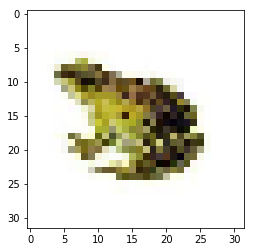

In [38]:
#输出图像
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img_keras)

In [39]:
#加入数组image
image.append(img_keras)
#转为np的array数组。
import numpy as np
np_image = np.array(image)
#查看数组的类型，是否和数据集一致：uint8
print(np_image.dtype)

uint8


In [40]:
#查看数组的大小，是否和数据集一致：
print(np_image.shape)

(1, 32, 32, 3)


In [41]:
#输出模型的识别结果，“青蛙”对应的是6
model.predict_classes(np_image)

array([6])

## 批量识别图片

写一个循环，将某个文件夹中的图片全部读入，一次识别。

In [42]:
#定义动物的名称
things_class=["airplane","automodile","bird","cat","deer","dog","frog","horse","ship","truck"]
#写一个循环，将文件夹中的图片全部读入，一次识别
import os
image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")
def list_images(basePath, contains=None):
    # 返回有效的图片路径数据集
    return list_files(basePath, validExts=image_types, contains=contains)
def list_files(basePath, validExts=None, contains=None):
    # 遍历图片数据目录，生成每张图片的路径
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # 循环遍历当前目录中的文件名
        for filename in filenames:
            if contains is not None and filename.find(contains) == -1:
                continue
            # 通过确定.的位置，从而确定当前文件的文件扩展名
            ext = filename[filename.rfind("."):].lower()
            # 检查文件是否为图像，是否应进行处理
            if validExts is None or ext.endswith(validExts):
                # 构造图像路径
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

image=[]
import numpy as np
from keras.preprocessing import image as k_image
imagePaths = list(list_images('./img/'))
print("------要识别的图片次序------")
for imagePath in imagePaths:
    print(imagePath)
    r_img = k_image.load_img(imagePath,target_size=(32,32))
    img_keras = k_image.img_to_array(r_img,dtype="uint8")
    image.append(img_keras)
np_image = np.array(image)

------要识别的图片次序------
./img/6-2.png
./img/3-5.png
./img/6-1.png
./img/0-2.png
./img/3-7.png
./img/0-1.png


In [46]:
#开始识别
from keras.models import load_model  
model = load_model('./model/4-model-vv.h5')
t=model.predict_classes(np_image)
for i in range(len(t)):
    print(t[i],end='，')
    print(things_class[t[i]])

6，frog
3，cat
6，frog
0，airplane
6，frog
0，airplane


看起来青蛙的识别效果很好，但是猫的识别率较差。查看了数据集，也许是图片集中的图片太小了，也有可能我提供的图片“3-7.png”中猫的颜色太像青蛙了。

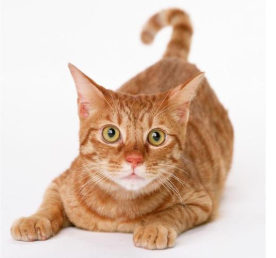

In [48]:
#单独识别这张图片，输出结果
model.predict(np_image[4:5])

array([[2.1368052e-05, 2.1789714e-10, 3.3275884e-02, 2.8363320e-01,
        4.1694264e-03, 4.2667729e-04, 6.7846495e-01, 6.4570586e-06,
        3.1928548e-07, 1.7239074e-06]], dtype=float32)

从数据中可以看出，在维度3上概率也是很大的，排第二位，值为“2.8363320e-01”。也许再多训练几次，效果就会好起来。